In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Notebook 3: Data Analysis

In Notebook 2, we have got the cleaned data of movies with all intrinsic features and the corresponding economic data. In the Notebook, we will conduct a general analysis for the internal and external features. Besides, we will specially study the revenue life pattern for collection/serial movies.

## 1. Import necessary libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")


## 2. final.csv

In [3]:
df=pd.read_csv('final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7732 entries, 0 to 7731
Data columns (total 42 columns):
Unnamed: 0                                           7732 non-null int64
Unnamed: 0.1                                         7732 non-null int64
title                                                7732 non-null object
imdb id                                              7732 non-null object
runtime                                              7732 non-null int64
genre                                                7732 non-null object
rate                                                 7732 non-null float64
rating count                                         7732 non-null float64
country                                              7732 non-null object
language                                             7732 non-null object
release date                                         7732 non-null object
budget                                               7732 non-null float64
gross

## 3. Clean DataSet
  ### 3.1 convert all rge str types to float type is possible

In [4]:
# fix all data type
import numpy as np
cols=list(df.columns)
for i in cols:
    try:
        df[i] = df[i].astype(float)
    except:
        pass   
df['World CPI 2']=df['World CPI 2'].replace('--',np.nan)
df['World CPI 2']=df['World CPI 2'].astype(float)
df['World CPI 2.1']=df['World CPI 2.1'].replace('--',np.nan)
df['World CPI 2.1']=df['World CPI 2.1'].astype(float)
df['US Real GDP: Gross Domestic Product']=df['US Real GDP: Gross Domestic Product'].replace('--',np.nan)
df['US Real GDP: Gross Domestic Product']=df['US Real GDP: Gross Domestic Product'].astype(float)

### 3.2 Remove years with less than 50 movies

Text(0.5, 1.0, 'Movie datapoint distribution(Before Cleanning)')

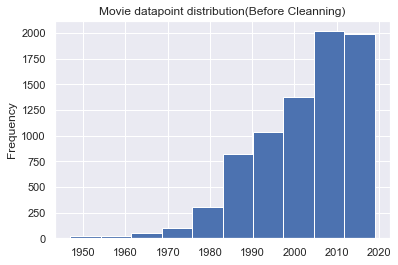

In [5]:
df['release year'].plot.hist()
plt.title('Movie datapoint distribution(Before Cleanning)')

In [6]:
df=df[(df['release year']>1980)&(df['release year']!=2000)]

### 3.3 Standarize Movie Revenue and Budget
- drop the movies with zero budget and revenue
- Create two new variables: Revenue_ppi and Budget_ppi using producer price index from economic data.
- The new variables denote the present value of their price in order to compare them across time
- We will justify this in part 7

In [7]:
df=df.drop(df.index[[1159, 3376, 3457, 3979, 4072, 4764, 6368]])

        standarize using ppi
        Producer Price Index at 2019 = 198.5
$$revenue_{pv}= \frac{revenue} {ppi} * 198.5$$

$$budget_{pv}  = \frac{budget}{ppi} * 198.5$$

In [8]:
df['gross usa_ppi']=df['gross usa']/df['Producer_Price_Index']*198.5
df['budget_ppi']=df['budget']/df['Producer_Price_Index']*198.5

## 4. budget outliner and Non US-currency Problem

### 4.1 Movies with highest Budget :

In [9]:
for i in [ 331, 1153, 1585, 3418, 3551, 3909, 3916, 3931]:
    print(df.iloc[i]['title'])

The Name of the Rose
Mai wei
First Snow
The Legend of Tarzan
The Conjuring 2
Mes provinciales
The Spy Who Dumped Me
Running for Grace


### Finding: Almost every high budget movie are korean movie. </li>
- reson: We found that imdb did not adjust the currency for non-us movie. so we decide to drop all non-us movies. 

### 4.2 Movie distribution
####         4.21 Distribution for US and Non-US Movie:

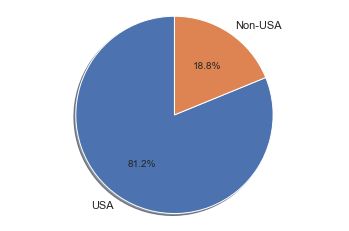

In [10]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'USA', 'Non-USA'
sizes = [5942, 1377]
explode = (0, 0,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

####   4.22 Distribution over times：

Text(0.5, 1.0, 'Movie datapoint distribution(After Cleanning)')

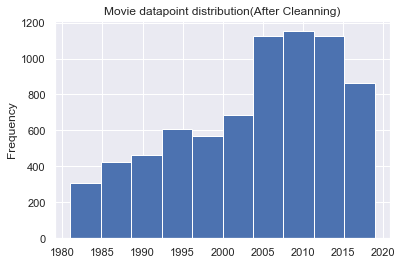

In [11]:
df['release year'].plot.hist()
plt.title('Movie datapoint distribution(After Cleanning)')

### 4.3 Solve currency problem in 4.1
### 4.31 budget over years ( US and non-US ):

In [12]:
df['release weekday']=pd.to_datetime(df['release date']).apply(lambda x: x.strftime('%A'))
df['release just quarter']=pd.to_datetime(df['release date']).dt.quarter
df['release just month']=pd.to_datetime(df['release date']).dt.month
df['release week of year']=pd.to_datetime(df['release date']).apply(lambda x: x.strftime('%U')).astype(int)

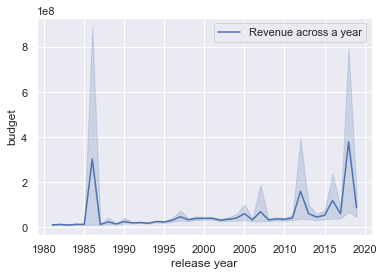

In [13]:
sns.lineplot(x='release year', y='budget',data=df,label='Revenue across a year')

### 4.32 budget over years ( US participated ) :

In [14]:
import ast
df['country']=df['country'].apply(lambda x: ast.literal_eval(x))
def is_USA(list_):
    if  'USA' in list_:
        return 1
    return 0
df['USA']=df['country'].apply(lambda x: is_USA(x))
df=df[df['USA']==1]

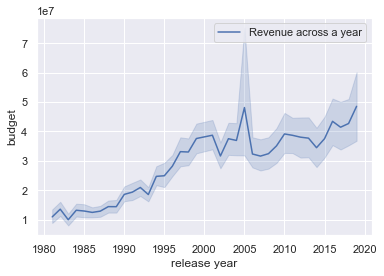

In [15]:
sns.lineplot(x='release year', y='budget',data=df,label='Revenue across a year')

### 4.33 budget over years ( only produced by US ): 
   #### The outliner disappear: we get rid of the currency outliner problem

In [16]:
def just_USA(list_):
    if (len(list_)==1) & ('USA' in list_):
        return 1
    return 0
df['just_USA']=df['country'].apply(lambda x: just_USA(x))
df=df[df['just_USA']==1]

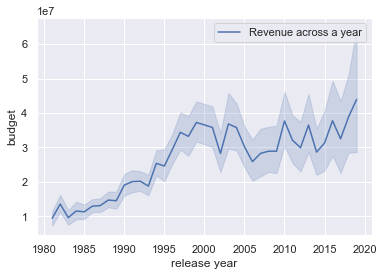

In [17]:
sns.lineplot(x='release year', y='budget',data=df,label='Revenue across a year')

## 4.4 *Realease week of year*  &  *Revenue*
- The red dot line denotes Holidays over a year. 
- Holiday & important dates: Superbowl, valentine, spring break and easter,
    Summer start of semester, start of semester, Thanksgiving, Christmas

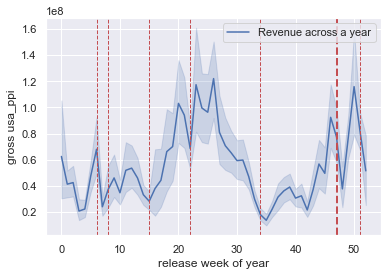

In [18]:
sns.lineplot(x='release week of year', y='gross usa_ppi',data=df,label='Revenue across a year')
plt.axvline(x=6, color='r', linestyle='dashed', linewidth=1) #superbowl
plt.axvline(x=8, color='r', linestyle='dashed', linewidth=1) #valentine
plt.axvline(x=15, color='r', linestyle='dashed', linewidth=1) #spring break and easter
plt.axvline(x=22, color='r', linestyle='dashed', linewidth=1) 
plt.axvline(x=34, color='r', linestyle='dashed', linewidth=1) #start of semester
plt.axvline(x=47, color='r', linestyle='dashed', linewidth=2) #Thanksgiving
plt.axvline(x=51, color='r', linestyle='dashed', linewidth=1)

### Subplot：Revenue on release week of year for *High Budget Movies* :

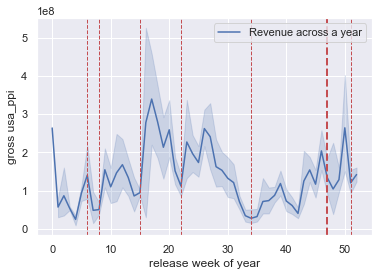

In [19]:
df3=df.iloc[np.where(df['budget']>5*10**7)]
sns.lineplot(x='release week of year', y='gross usa_ppi',data=df3,label='Revenue across a year')
plt.axvline(x=6, color='r', linestyle='dashed', linewidth=1) #superbowl
plt.axvline(x=8, color='r', linestyle='dashed', linewidth=1) #valentine
plt.axvline(x=15, color='r', linestyle='dashed', linewidth=1) #spring break and easter
plt.axvline(x=22, color='r', linestyle='dashed', linewidth=1) 
plt.axvline(x=34, color='r', linestyle='dashed', linewidth=1) #start of semester
plt.axvline(x=47, color='r', linestyle='dashed', linewidth=2) #Thanksgiving
plt.axvline(x=51, color='r', linestyle='dashed', linewidth=1)

## 5. Profibility : *Return Rate* or Revenue
create a new variable `Return rate` to estimate the profibility of a movie
 $$ Return Rate = \frac{gross USA_{ppi}}{budget_{ppi}}$$

In [20]:
df['return rate']=df['gross usa_ppi']/df['budget_ppi']

### 5.1
### Return Rate over a year without cleanning 

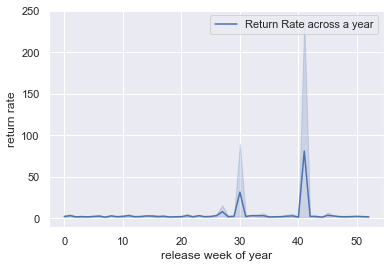

In [21]:
sns.lineplot(x='release week of year', y='return rate',data=df,label='Return Rate across a year')

### Movies with more than 100 times return rate
#### Finding: Most of them are horror movies

In [22]:
df[(df['return rate']>100) & (df['gross usa_ppi']>1000000)]['title']

697           Napoleon Dynamite
1395          Facing the Giants
2456        Paranormal Activity
4396                The Gallows
6027    The Blair Witch Project
7266                     Clerks
7298                    Go Fish
Name: title, dtype: object

### Return Rate over a year for movies within 5 times return

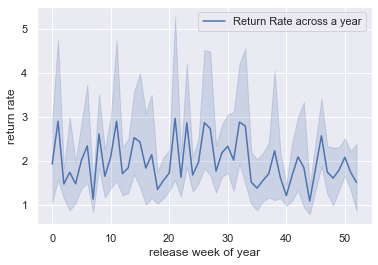

In [23]:
df2=df.drop(df.index[[ 390,  728, 1255, 2143, 2954, 3728, 3755]])
sns.lineplot(x='release week of year', y='return rate',data=df2,label='Return Rate across a year')

### 5.2

### Return Rate for low-cost movies over a year ( less than 50 million )
   - No clear trend
   - high average return rate: about 200%
   - Almost every movie make positive profit 
       - Potential Reason: the bad low-cost movie couldn't release
   - Average return rate span from 1 to 2

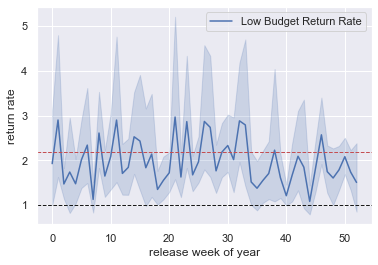

In [24]:
df2=df.drop(df.index[[ 390,  728, 1255, 2143, 2954, 3728, 3755]])
sns.lineplot(x='release week of year', y='return rate',data=df2,label='Low Budget Return Rate')
plt.axhline(y=df2.iloc[np.where(df2['budget_ppi']<5*10**7)]['return rate'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axhline(y=1, color='k', linestyle='dashed', linewidth=1)

### Return Rate for High-budget movies
   - Clear high return during **summer holiday and winter holidays**
   - About half of the movies lost money 
   

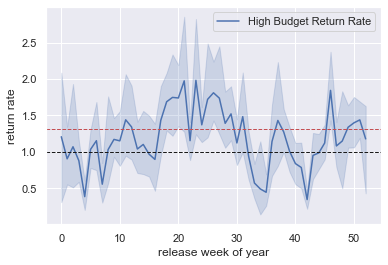

In [25]:
# 500 w up
df3=df2.iloc[np.where(df2['budget_ppi']>5*10**7)]
sns.lineplot(x='release week of year', y='return rate',data=df3,label='High Budget Return Rate')
plt.axhline(y=df2.iloc[np.where(df2['budget_ppi']>5*10**7)]['return rate'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axhline(y=1, color='k', linestyle='dashed', linewidth=1)

### Low Budget vs High Budget return rate

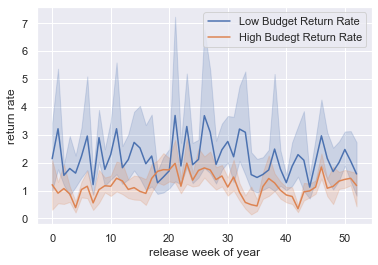

In [26]:
df3=df2.iloc[ np.where(df2['budget_ppi']<5*10**7)]      
df4=df2.iloc[ np.where(df2['budget_ppi']>5*10**7)]
sns.lineplot(x='release week of year', y='return rate',data=df3,label='Low Budget Return Rate')
sns.lineplot(x='release week of year', y='return rate',data=df4,label='High Budegt Return Rate')

### 5.3 Rating & return rate
 - rating and return rate are positively related

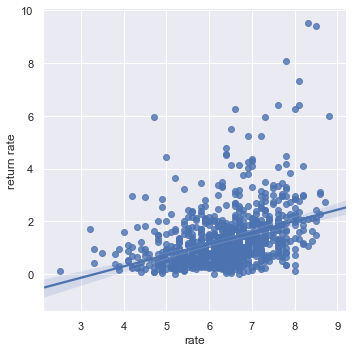

In [27]:
sns.lmplot(x='rate', y='return rate',data=df4)

 - Distribution of movie rating

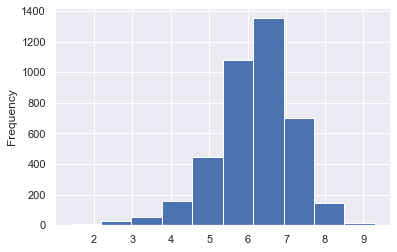

In [28]:
df2['rate'].plot.hist()

###  5.4 Budget & *return rate* / *Revenue*
   - This is no sinificant corelation between budget and return rate

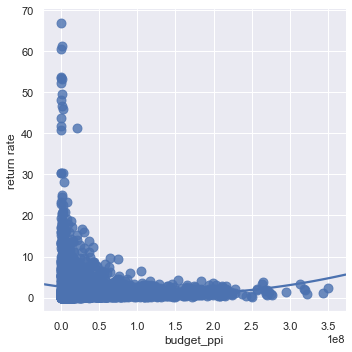

In [29]:
# for low budget
df3=df2.iloc[ np.where(df2['budget_ppi']<5*10**7)]
df3=df3.iloc[ np.where(df3['budget_ppi']>5000000)]
sns.lmplot(x='budget_ppi', y='return rate',data=df2,order=2, ci=None, scatter_kws={"s": 80})

 - However, budget is strongly related to the movie revenue
 - Thus, higher budget may not affect the profibility, but may largely affect the scale of income

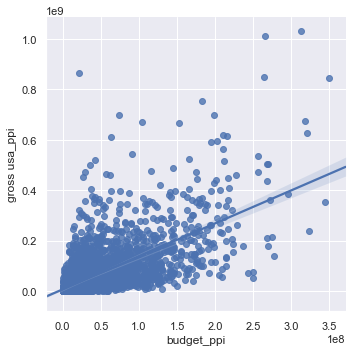

In [30]:
sns.lmplot(x='budget_ppi', y='gross usa_ppi',data=df2)

## 6. Distribution of release period
 - release date are almost uniformly distributed
 - However, Friday is the most frequent release day in week. All movies tend to launch on Friday, which make sense.

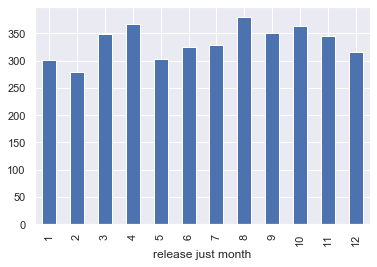

In [31]:
df.groupby(['release just month'], sort = True).size().plot(kind='bar')

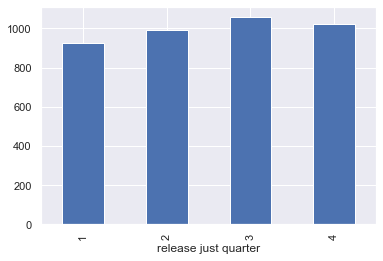

In [32]:
df.groupby(['release just quarter'], sort = True).size().plot(kind='bar')

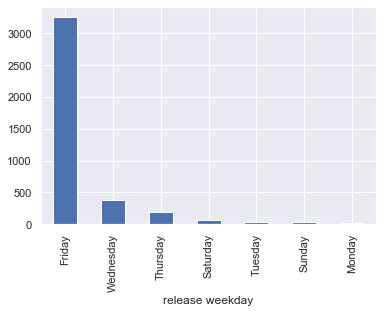

In [33]:
df.groupby(['release weekday'], sort = False).size().plot(kind='bar')

## 7. Economics ( Justify 3.3 standarizing )
In part 3.3 we standarize these two variables:
    - US Nomial Movie Revenue from 1890 to present
    - US Movie Revenue Present Value from 1890 to present

        standarize using ppi
        Producer Price Index at 2019 = 198.5
$$revenue_{pv}= \frac{revenue} {ppi} * 198.5$$

$$budget_{pv}  = \frac{budget}{ppi} * 198.5$$

#### Movies US-revenue growth path and Producer Price Index ( PPI ) :
 - US-revenue and PPI share a similar trend
 - we can use it to flatten the US-revenue to the present value

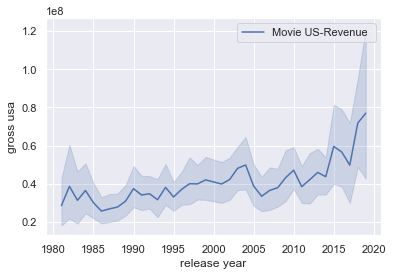

In [34]:
sns.lineplot(x="release year", y='gross usa',data=df2,label='Movie US-Revenue ')

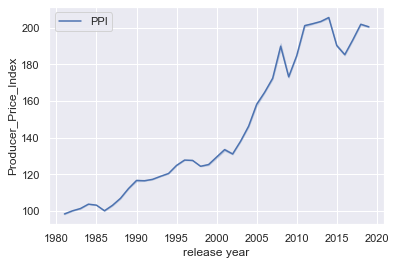

In [35]:
sns.lineplot(x="release year", y= 'Producer_Price_Index',data=df2,label='PPI')

#### Flatten movie US-revenue (gross usa_ppi)

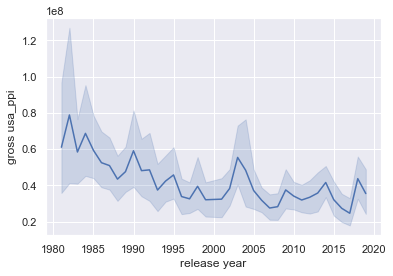

In [36]:
sns.lineplot(x="release year", y= 'gross usa_ppi',data=df3)

#### Other Economic Index

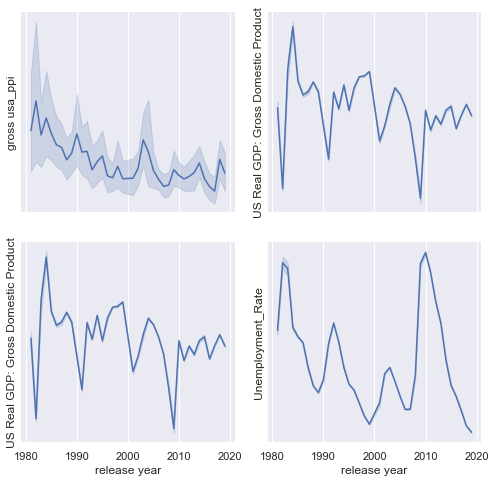

In [37]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.lineplot(x="release year", y= 'gross usa_ppi',data=df3, ax=axes[0, 0])
sns.lineplot(x="release year", y='US Real GDP: Gross Domestic Product',data=df, ax=axes[0, 1])
sns.lineplot(x="release year", y='US Real GDP: Gross Domestic Product',data=df, ax=axes[1, 0])
sns.lineplot(x="release year", y='Unemployment_Rate',data=df, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

## 8. Production Companies

### Top 5 productive companies ( number of movie )

In [38]:
import itertools
from collections import Counter
prod_company=list(itertools.chain(*list(df['production company'])))
d=Counter(prod_company)
company_df=pd.DataFrame(pd.Series(d,index=d.keys()))
company_df.columns=['Count']
top5df=company_df.sort_values(by='Count', ascending=False).head()
top5df['Company']=np.array(['Warner Bros','Paramount Pictures','Universal Pictures','Columbia Pictures','Twentieth Century Fox'])
top5df

,Count,Company
0,26270,Warner Bros
',23354,Paramount Pictures
c,11677,Universal Pictures
o,11677,Columbia Pictures
",",7674,Twentieth Century Fox


### Top 5 High Average Revenue Company

In [39]:
dictionary=dict()
for i in range(df.shape[0]):    # of rows
    for company in df['production company'].iloc[i]: 
               if company not in dictionary.keys():
                    dictionary[company]=[]
               dictionary[company].append(i)
            
dictionary2=dict()
for company in dictionary.keys():
    dictionary2[company]=np.mean(df.iloc[dictionary[company]]['gross usa_ppi'])

company_df=pd.DataFrame.from_dict(dictionary2, orient='index')
company_df.columns=['Avg gross usa_ppi']
top5df=company_df.sort_values(by='Avg gross usa_ppi', ascending=False).head()
top5df['Company']=np.array(['Truenorth Productions','South Pictures','Jason Roberts Productions','Formula Film','Jucumari Films'])
top5df

,Avg gross usa_ppi,Company
0,6.278588e+07,Truenorth Productions
9,6.083261e+07,South Pictures
,5.955593e+07,Jason Roberts Productions
",",5.955593e+07,Formula Film
7,5.926031e+07,Jucumari Films


### Top 5 Return Rate Companies

In [40]:
dictionary=dict()
for i in range(df.shape[0]):    # of rows
    for company in df['production company'].iloc[i]: 
               if company not in dictionary.keys():
                    dictionary[company]=[]
               dictionary[company].append(i)
            
dictionary2=dict()
for company in dictionary.keys():
    dictionary2[company]=np.mean(df.iloc[dictionary[company]]['return rate'])

company_df=pd.DataFrame.from_dict(dictionary2, orient='index')
company_df.columns=['Avg return rate']
top5df=company_df.sort_values(by='Avg return rate', ascending=False).head()
top5df['Company']=np.array(['Solana Films','Haxan Films','Blumhouse Productions','Tremendum Pictures','Can I Watch'])
top5df

,Avg return rate,Company
9,5.560751,Solana Films
3,5.378386,Haxan Films
1,4.687434,Blumhouse Productions
],4.543325,Tremendum Pictures
[,4.543325,Can I Watch


### Top 5 Profit Companies

In [41]:
df['profit_ppi']=df['gross usa_ppi']-df['budget_ppi']
dictionary=dict()
for i in range(df.shape[0]):    # of rows
    for company in df['production company'].iloc[i]: 
               if company not in dictionary.keys():
                    dictionary[company]=[]
               dictionary[company].append(i)
            
dictionary2=dict()
for company in dictionary.keys():
    dictionary2[company]=np.mean(df.iloc[dictionary[company]]['profit_ppi'])

company_df=pd.DataFrame.from_dict(dictionary2, orient='index')
company_df.columns=['Avg Profit_ppi']
top5df=company_df.sort_values(by='Avg Profit_ppi', ascending=False).head()
top5df['Company']=np.array(['Truenorth Productions','Black Rhino Productions(Ghostbuster)','Jason Roberts Productions','South Pictures','Pandora Films'])
top5df


,Avg Profit_ppi,Company
9,2.092461e+07,Truenorth Productions
0,1.997521e+07,Black Rhino Productions(Ghostbuster)
7,1.916346e+07,Jason Roberts Productions
,1.815551e+07,South Pictures
",",1.815551e+07,Pandora Films
